In [92]:
import numpy as np
import pandas as pd
from edempy import Deck
from extrapolation import extrapolation
from LaceyClass import LaceyMixingAnalyzer
import matplotlib.pyplot as plt
from rnn.data_loader_rnn import RNNLoader
from rnn.rnn_extrap import plot_particles, import_dict
import os


sim_names = ["Rot_drum_mono", "Rot_drum_binary_mixed", "Rot_drum_400k"]
sim_name = sim_names[-1]
sim_path =rf"V:\GrNN_EDEM-Sims\{sim_name}.dem"

In [93]:
lacey_settings = f"{sim_path[:-4]}_data\Export_Data\Lacey_settings.txt"

with open(lacey_settings, 'r') as file:
    preferences = file.readlines()
    minCoords = np.array([float(i) for i in str(preferences[1]).split(',')])
    maxCoords = np.array([float(i) for i in str(preferences[3]).split(',')])
    bins = np.array([int(i) for i in str(preferences[5]).split(',')])
    cut_off = int(preferences[7])
    plot = str(preferences[9])
    file.close()
    settings = True

lacey = LaceyMixingAnalyzer(minCoords, maxCoords, bins)
rnn = RNNLoader(1,20,sim_path)


In [104]:
delta_t = 0.05
b_coords_lacey, div_size_lacey = lacey.grid()
extrapolated_lacey = []
extrapolated_time = []
id_dict_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data"
id_dict = import_dict(id_dict_path, "id_dict")
plots_path = rf"{sim_path[:-4]}_data\Export_Data\extrap_algo_plots"


# for timestep in np.arange(rnn.start_t, rnn.end_t+delta_t, delta_t):
#     timestep_i = rnn.find_nearest(timestep, rnn.deck.timestepValues)
#     particles = rnn.get_particle_data(timestep_i)
#     particles = np.delete(particles, [3,4,5], 1)

#     plot_filename = rf"{plots_path}\{timestep:.2f}.png"
#     pred_t_mass = plot_particles(particles, id_dict, True, timestep, plot_path=plot_filename)
#     mass_1, mass_2, conc = lacey.bining(b_coords_lacey, div_size_lacey, pred_t_mass, cut_off)
#     Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(pred_t_mass))
#     print(f"{timestep}: {Lacey_index}")
#     extrapolated_lacey.append(Lacey_index)
#     extrapolated_time.append(timestep)

#np.savetxt(rf"{plots_path}\_lacey.csv", np.column_stack((extrapolated_time, extrapolated_lacey)), delimiter=",")
    

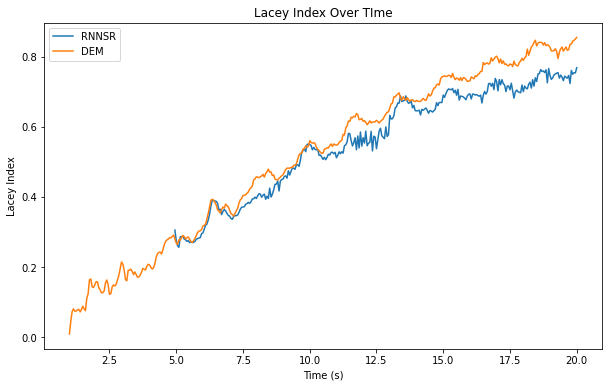

In [105]:
# Specify the folder path where your CSV files are located
folder_path = id_dict_path

# Initialize an empty list to store numpy arrays from each file
data_arrays = []

# Function to read CSV file and return a numpy array
def read_csv_to_numpy(file_path):
    return np.loadtxt(file_path, delimiter=',')

# Iterate through all files in the folder and its subfolders
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith('_lacey.csv'):
            file_path = os.path.join(root, filename)
            
            # Read the CSV file and append the numpy array to data_arrays
            data_arrays.append(read_csv_to_numpy(file_path))

# Plot the data from all files
plt.figure(figsize=(10, 6))

for i, data_array in enumerate(data_arrays):
    
    if i == 0:
    # Customize the plot as needed using commands like plt.plot() or plt.scatter()
        plt.plot(data_array[:, 0], data_array[:, 1], label="RNNSR")
    else:
        plt.plot(data_array[:, 0], data_array[:, 1], label="DEM")

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Lacey Index')
plt.title('Lacey Index Over TIme')
plt.legend()
plt.show()


In [96]:
## Extrapolation algo

#simulation parameters
start_t = 1
end_t = 20
domain_x = (-0.07, 0.07)       
domain_y = (-0.025, 0.025)
domain_z = (-0.07, 0.07)
num_bins = 10
direction = "y"

extrap = extrapolation(start_t, end_t, sim_path, domain_x, domain_y, domain_z, num_bins, direction)

In [97]:
kinetic_energies, peak_times, peak_index, highlight_y = extrap.kin_energies(0.0002, 5)

Analysing Kinetic Energies...


In [140]:
plt.figure(figsize=(8,12))
kin_e = np.column_stack((extrap.deck.timestepValues[extrap.start:], kinetic_energies))
plt.plot(kin_e[:,0], -kin_e[:,1])

plt.scatter(peak_times, highlight_y, c="red")
x = (0.9,10)

plt.xlim(left=x[0], right=x[1])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 702 and the array at index 1 has size 701

<Figure size 576x864 with 0 Axes>

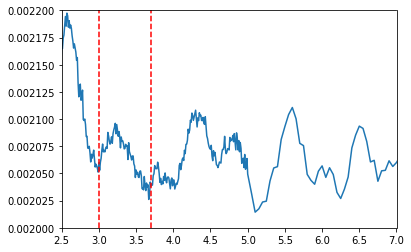

In [107]:
#plt.figure(figsize=(8,12), dpi=100)
plt.plot(kin_e[:,0], -kin_e[:,1])

plt.scatter(peak_times, highlight_y, c="red")
x = (2.5,7)

plt.xlim(left=x[0], right=x[1])
plt.ylim(0.002, 0.0022)
plt.axvline(x=3, color='red', linestyle='--')
plt.axvline(x=3.7, color='red', linestyle='--')


In [126]:
t1 = 3
t2 = 3.7

t1_index = extrap.find_nearest(extrap.deck.timestepValues, t1)
t2_index = extrap.find_nearest(extrap.deck.timestepValues, t2)
print(t1_index, t2_index)

t1_data = extrap.get_particle_coords(t1_index)
t2_data = extrap.get_particle_coords(t2_index)


301 371


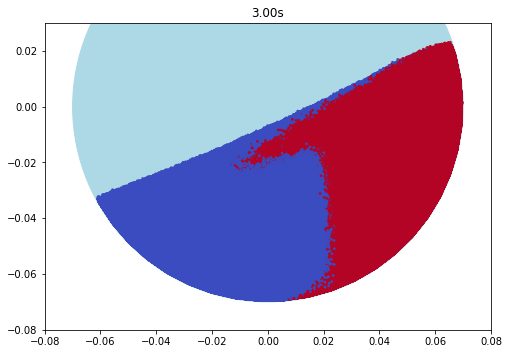

<Figure size 432x288 with 0 Axes>

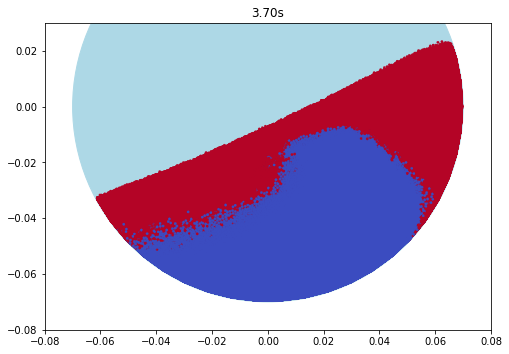

array([[ 3.96017360e-02, -2.45119793e-02, -4.03433156e-02,
         1.30899694e-06,  3.13113000e+05,  0.00000000e+00],
       [ 2.69592673e-02, -2.45116468e-02, -3.49307543e-02,
         1.30899694e-06,  1.60645000e+05,  0.00000000e+00],
       [ 3.11681673e-03, -2.45115515e-02, -4.23012907e-02,
         1.30899694e-06,  1.84021000e+05,  0.00000000e+00],
       ...,
       [ 4.12946199e-02,  2.45110212e-02, -4.06179225e-02,
         1.30899694e-06,  2.04898000e+05,  0.00000000e+00],
       [ 2.19184168e-02,  2.45116549e-02, -4.63072701e-02,
         1.30899694e-06,  2.45497000e+05,  0.00000000e+00],
       [ 9.89736146e-03,  2.45118981e-02, -3.71977046e-02,
         1.30899694e-06,  2.25929000e+05,  0.00000000e+00]])

<Figure size 432x288 with 0 Axes>

In [135]:
id_dict = import_dict(id_dict_path, "id_dict")

plot_filename = rf"{plots_path}\{t1:.2f}.png"
plot_particles(t1_data, id_dict, True, t1, plot_path=plot_filename)


plot_filename = rf"{plots_path}\{t2:.2f}.png"
plot_particles(t2_data, id_dict, True, t2, plot_path=plot_filename)

In [147]:
len(extrap.deck.timestepValues[extrap.start:])

702

In [148]:
len(kin_e[:,0])

702